In [8]:
%load_ext autoreload
%autoreload 2
import sys
import torch
from torch import nn
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
from typing import Union
from ml_utilities.torch_models.base_model import BaseModel
from ml_utilities.torch_models.fc import FC
from ml_utilities.torch_models import get_model_class
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

from erank.data.datasetgenerator import DatasetGenerator
from erank.utils import load_directions_matrix_from_task_sweep
from ml_utilities.data_utils import calculate_dataset_mean_std, show_images
from ml_utilities.utils import convert_dict_to_python_types

gpu_id = 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
data_dir = '/home/max/phd/data'

In [10]:
data_cfg = f"""
data:
  dataset: mnist 
  dataset_kwargs:
    data_root_path: {data_dir}
  dataset_split:
    train_val_split: 0.8
"""
data_cfg = OmegaConf.create(data_cfg)
data_cfg = data_cfg.data
print(OmegaConf.to_yaml(data_cfg))

dataset: mnist
dataset_kwargs:
  data_root_path: /home/max/phd/data
dataset_split:
  train_val_split: 0.8



In [11]:
dataset_generator = DatasetGenerator(dataset=data_cfg.dataset,
                                     dataset_kwargs=data_cfg.dataset_kwargs,
                                     dataset_split=data_cfg.dataset_split)
dataset_generator.generate_dataset()
train_set, val_set = dataset_generator.train_split, dataset_generator.val_split

In [12]:
len(train_set), len(val_set)

(48000, 12000)

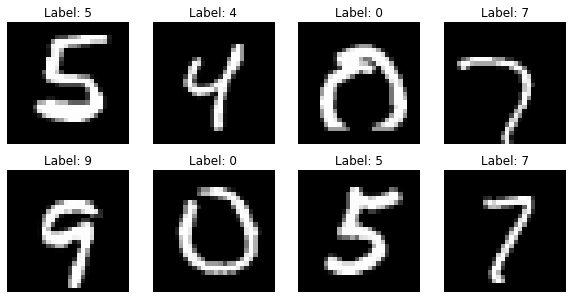

In [17]:
show_images(train_set, 10, 4, cmap='gray')